In [71]:
import pandas as pd 
import glob
import os

In [72]:
path='C:/Users/Lenovo/OneDrive/Bureau/Demandforecast'
all_files = glob.glob(os.path.join(path, "*.csv"))
df_list=[]
for f in all_files:
    df = pd.read_csv(f)
    df_list.append(df)
data = pd.concat(df_list, ignore_index=True)


In [64]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_day,started_at_hour,ended_at_day,ended_at_hour,duration_mins,day
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member,NaN,NaN,NaN,NaN,NaN,NaN
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member,NaN,NaN,NaN,NaN,NaN,NaN
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member,NaN,NaN,NaN,NaN,NaN,NaN
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member,NaN,NaN,NaN,NaN,NaN,NaN
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005578 entries, 0 to 6005577
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  started_at_day      object 
 14  started_at_hour     float64
 15  ended_at_day        object 
 16  ended_at_hour       float64
 17  duration_mins       float64
 18  day                 object 
dtypes: float64(7), object(12)
memory usage: 870.6+ MB


In [73]:
data.isnull().sum()

ride_id               2261848
rideable_type         2261848
started_at            2261848
ended_at              2261848
start_station_name     457137
start_station_id      2718982
end_station_name       487755
end_station_id        2749603
start_lat             2261848
start_lng             2261848
end_lat               2265081
end_lng               2265081
member_casual         2261848
started_at_day        3743730
started_at_hour       3743730
ended_at_day          3743730
ended_at_hour         3743730
duration_mins         3743730
day                   3743730
dtype: int64

In [83]:
data.duplicated().sum()

274814

In [75]:
for col in data.columns:
    if data[col].dtype == 'float64':
       data[col] = data[col].fillna(data[col].mean())
   
  

        

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005578 entries, 0 to 6005577
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  started_at_day      object 
 14  started_at_hour     float64
 15  ended_at_day        object 
 16  ended_at_hour       float64
 17  duration_mins       float64
 18  day                 object 
dtypes: float64(7), object(12)
memory usage: 870.6+ MB


In [82]:
data.drop_duplicates



<bound method DataFrame.drop_duplicates of                   ride_id  rideable_type           started_at  \
0        99FEC93BA843FB20  electric_bike  2021-06-13 14:31:28   
1        06048DCFC8520CAF  electric_bike  2021-06-04 11:18:02   
2        9598066F68045DF2  electric_bike  2021-06-04 09:49:35   
3        B03C0FE48C412214  electric_bike  2021-06-03 19:56:05   
4        B9EEA89F8FEE73B7  electric_bike  2021-06-04 14:05:51   
...                   ...            ...                  ...   
6005573               NaN            NaN                  NaN   
6005574               NaN            NaN                  NaN   
6005575               NaN            NaN                  NaN   
6005576               NaN            NaN                  NaN   
6005577               NaN            NaN                  NaN   

                    ended_at           start_station_name start_station_id  \
0        2021-06-13 14:34:11                          NaN              NaN   
1        2021-06-04 

In [70]:
data.shape

(0, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             0 non-null      object 
 1   rideable_type       0 non-null      object 
 2   started_at          0 non-null      object 
 3   ended_at            0 non-null      object 
 4   start_station_name  0 non-null      object 
 5   start_station_id    0 non-null      object 
 6   end_station_name    0 non-null      object 
 7   end_station_id      0 non-null      object 
 8   start_lat           0 non-null      float64
 9   start_lng           0 non-null      float64
 10  end_lat             0 non-null      float64
 11  end_lng             0 non-null      float64
 12  member_casual       0 non-null      object 
 13  started_at_day      0 non-null      object 
 14  started_at_hour     0 non-null      float64
 15  ended_at_day        0 non-null      object 
 16  ended_at_hour       0 non

In [ ]:
data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
started_at_day        0
started_at_hour       0
ended_at_day          0
ended_at_hour         0
duration_mins         0
day                   0
dtype: int64

In [ ]:
data.info()
       
        

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             0 non-null      object 
 1   rideable_type       0 non-null      object 
 2   started_at          0 non-null      object 
 3   ended_at            0 non-null      object 
 4   start_station_name  0 non-null      object 
 5   start_station_id    0 non-null      object 
 6   end_station_name    0 non-null      object 
 7   end_station_id      0 non-null      object 
 8   start_lat           0 non-null      float64
 9   start_lng           0 non-null      float64
 10  end_lat             0 non-null      float64
 11  end_lng             0 non-null      float64
 12  member_casual       0 non-null      object 
 13  started_at_day      0 non-null      object 
 14  started_at_hour     0 non-null      float64
 15  ended_at_day        0 non-null      object 
 16  ended_at_hour       0 non

In [ ]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

In [ ]:
data['started_at_day'] = data['started_at'].dt.strftime('%A')
data['started_at_hour'] = data['started_at'].dt.hour
data['ended_at_day'] = data['ended_at'].dt.strftime('%A')
data['ended_at_hour'] = data['ended_at'].dt.hour

data['duration'] = data['ended_at'] - data['started_at']

In [ ]:
data['duration_mins'] = (data['duration'].dt.total_seconds()/60).round()

In [ ]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_day,started_at_hour,ended_at_day,ended_at_hour,duration_mins,day,duration


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   ride_id             0 non-null      object         
 1   rideable_type       0 non-null      object         
 2   started_at          0 non-null      datetime64[ns] 
 3   ended_at            0 non-null      datetime64[ns] 
 4   start_station_name  0 non-null      object         
 5   start_station_id    0 non-null      object         
 6   end_station_name    0 non-null      object         
 7   end_station_id      0 non-null      object         
 8   start_lat           0 non-null      float64        
 9   start_lng           0 non-null      float64        
 10  end_lat             0 non-null      float64        
 11  end_lng             0 non-null      float64        
 12  member_casual       0 non-null      object         
 13  started_at_day      0 non-null      object         


In [ ]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'started_at_day', 'started_at_hour', 'ended_at_day',
       'ended_at_hour', 'duration_mins', 'day', 'duration'],
      dtype='object')

In [ ]:
data.shape

(0, 20)

In [ ]:
test = data.groupby(['started_at_day','member_casual'])['ride_id'].count().to_frame().reset_index()
test

,started_at_day,member_casual,ride_id


In [ ]:
import plotly.express as px 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

Text(0.5, 1.0, 'Number of Rides by day of the Week')

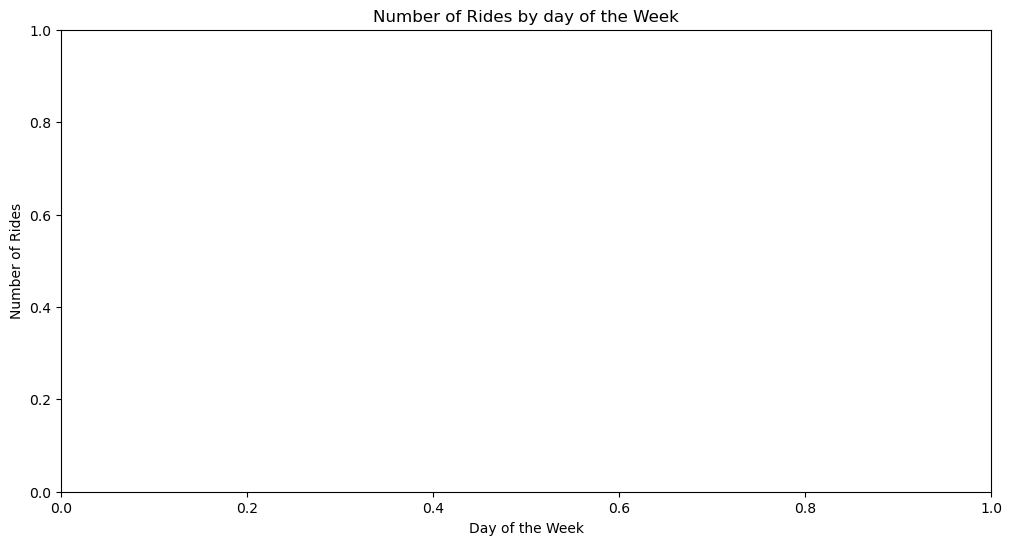

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data = test, x='started_at_day', y= 'ride_id', hue='member_casual')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by day of the Week")

In [ ]:
df_start = data.groupby(['started_at_hour','started_at_day'])['ride_id'].count().to_frame().reset_index()
df_start.head(10)

,started_at_hour,started_at_day,ride_id


Text(0, 0.5, 'Number of Rides')

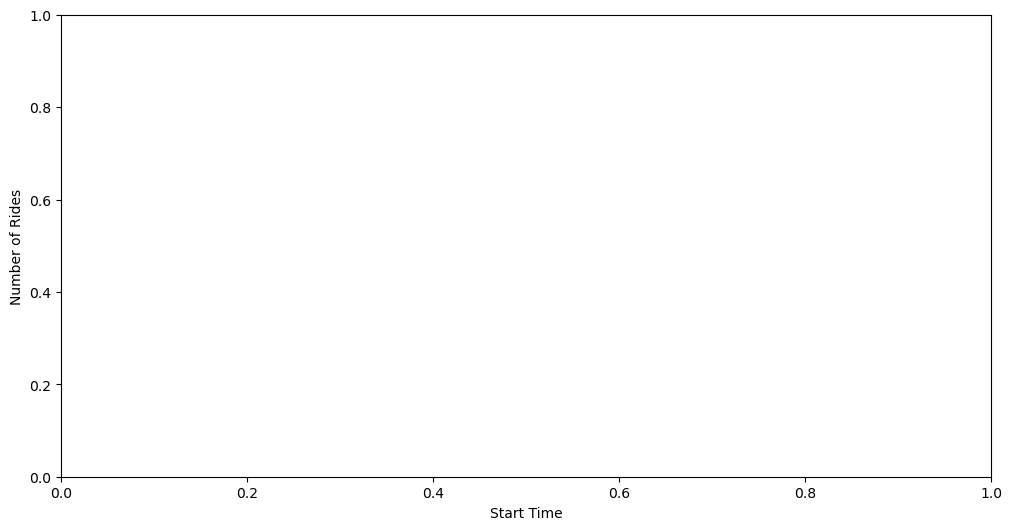

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.lineplot(data = df_start, x = 'started_at_hour', y= 'ride_id', hue = 'started_at_day', ax=ax)
plt.xlabel("Start Time")
plt.ylabel("Number of Rides")

In [ ]:
data.shape

(0, 20)

In [ ]:
import numpy as np
weekday = ['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday']
data["day"] = data["started_at_day"].apply(lambda x: 'Weekday' if x in weekday else 'Weekend')


In [ ]:
df1 = data.groupby(['started_at_hour','day'])['ride_id'].count().to_frame().reset_index()
df1.head()

,started_at_hour,day,ride_id


Text(0, 0.5, 'Number of Rides')

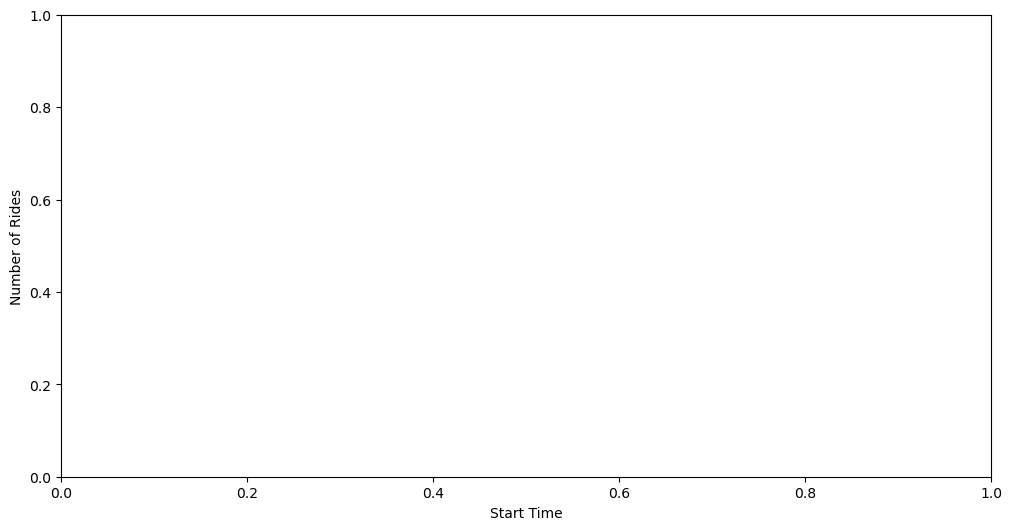

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data = df1, x = 'started_at_hour', y= 'ride_id', hue = 'day', ax=ax)
plt.xlabel("Start Time")
plt.ylabel("Number of Rides")

In [ ]:
df3 = data.groupby(['member_casual','started_at_day','started_at_hour','day'])['ride_id'].count().to_frame().reset_index().rename(columns = {'ride_id':'number_of_rides'})
df3.head()

,member_casual,started_at_day,started_at_hour,day,number_of_rides


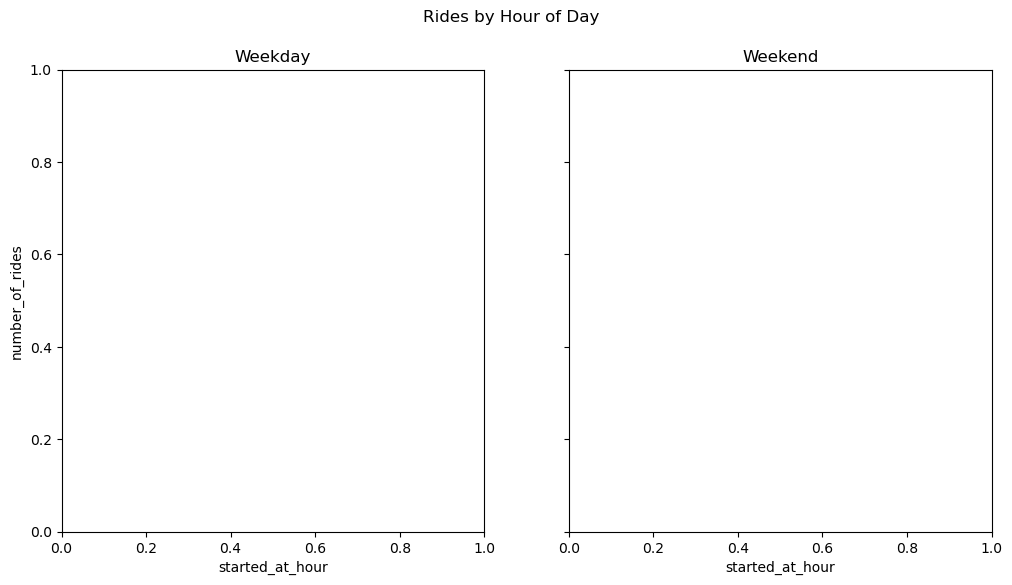

In [ ]:
weekday = df3[df3['day'] == "Weekday"]
weekend = df3[df3['day'] == "Weekend"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), sharey=True)
fig.suptitle('Rides by Hour of Day')
ax1.set_title("Weekday")
ax2.set_title("Weekend")
sns.lineplot(data = weekday, x = 'started_at_hour', y= 'number_of_rides', hue = 'member_casual', ax=ax1)
sns.lineplot(data = weekend, x = 'started_at_hour', y= 'number_of_rides', hue = 'member_casual', ax=ax2);

In [ ]:
data['duration'].describe()


count      0
mean     NaT
std      NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: duration, dtype: object

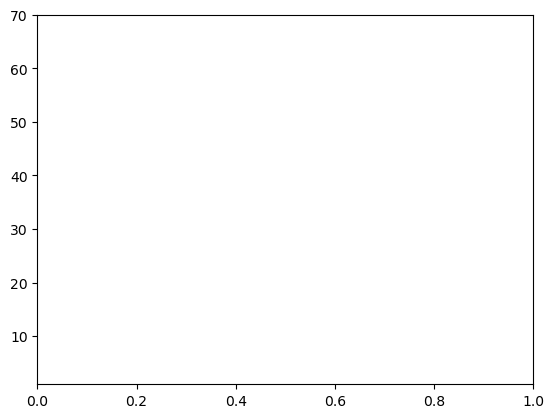

In [ ]:
sns.boxplot(data, x = 'member_casual', y = 'duration_mins')
plt.ylim(1, 70)
plt.show()

Text(0.5, 1.0, 'Distribution of Ride Duration by Day of the Week')

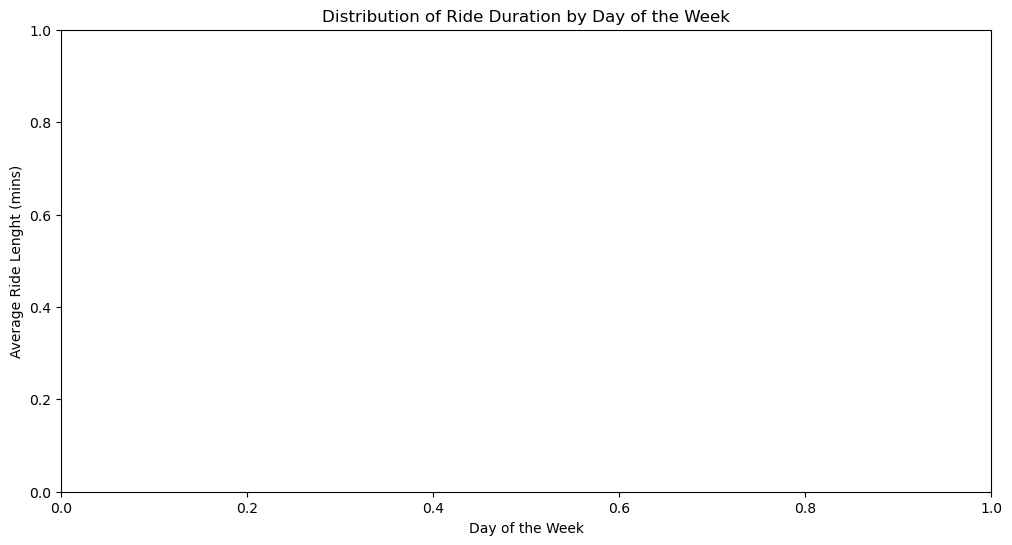

In [ ]:
new_df = data.groupby(['started_at_day', 'member_casual', 'day'])['duration_mins'].mean().round().to_frame().reset_index()

fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(data = new_df, x='started_at_day', y= 'duration_mins', hue='member_casual')
plt.xlabel("Day of the Week")
plt.ylabel("Average Ride Lenght (mins)")
plt.title("Distribution of Ride Duration by Day of the Week")

In [ ]:
data['start_station_name'].value_counts().sort_values(ascending=False).head(10).T

Series([], Name: count, dtype: int64)

In [ ]:
new2 = data.groupby(['member_casual','start_station_name', 'start_lat', 'start_lng'])['ride_id'].count().to_frame().sort_values('ride_id', ascending=False).reset_index()
new2.head(10)

,member_casual,start_station_name,start_lat,start_lng,ride_id


In [ ]:
top_5_casual = new2[new2.member_casual == 'casual'].sort_values('ride_id', ascending=False).head()
top_5_member = new2[new2.member_casual == 'member'].sort_values('ride_id', ascending=False).head()
top_starting_locations = pd.concat([top_5_member, top_5_casual])
top_starting_locations

,member_casual,start_station_name,start_lat,start_lng,ride_id


In [ ]:

top_starting_locations['start_lat'] = top_starting_locations['start_lat'].astype(float)
top_starting_locations['start_lng'] = top_starting_locations['start_lng'].astype(float)

fig = px.scatter_mapbox(
    top_starting_locations,
    lat = 'start_lat',
    lon = 'start_lng',
    mapbox_style ='open-street-map',
    size = 'ride_id',
    color = 'member_casual'
)

fig.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   ride_id             0 non-null      object         
 1   rideable_type       0 non-null      object         
 2   started_at          0 non-null      datetime64[ns] 
 3   ended_at            0 non-null      datetime64[ns] 
 4   start_station_name  0 non-null      object         
 5   start_station_id    0 non-null      object         
 6   end_station_name    0 non-null      object         
 7   end_station_id      0 non-null      object         
 8   start_lat           0 non-null      float64        
 9   start_lng           0 non-null      float64        
 10  end_lat             0 non-null      float64        
 11  end_lng             0 non-null      float64        
 12  member_casual       0 non-null      object         
 13  started_at_day      0 non-null      object         


In [ ]:
new3 = data.groupby(['member_casual','end_station_name', 'end_lat', 'end_lng'])['ride_id'].count().to_frame().sort_values('ride_id', ascending=False).reset_index()
new3.head(10)

,member_casual,end_station_name,end_lat,end_lng,ride_id


In [ ]:
top_5_casual = new3[new3.member_casual == 'casual'].sort_values('ride_id', ascending=False).head()
top_5_member = new3[new3.member_casual == 'member'].sort_values('ride_id', ascending=False).head()
top_ended_locations = pd.concat([top_5_member, top_5_casual])

top_ended_locations['end_lat'] = top_ended_locations['end_lat'].astype(float)
top_ended_locations['end_lng'] = top_ended_locations['end_lng'].astype(float)
top_ended_locations.head()




,member_casual,end_station_name,end_lat,end_lng,ride_id


In [ ]:
fig = px.scatter_mapbox(
    top_ended_locations,
    lat = 'end_lat',
    lon = 'end_lng',
    mapbox_style ='open-street-map',
    size = 'ride_id',
    color = 'member_casual')

fig.show()

In [ ]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'started_at_day', 'started_at_hour', 'ended_at_day',
       'ended_at_hour', 'duration_mins', 'day', 'duration'],
      dtype='object')

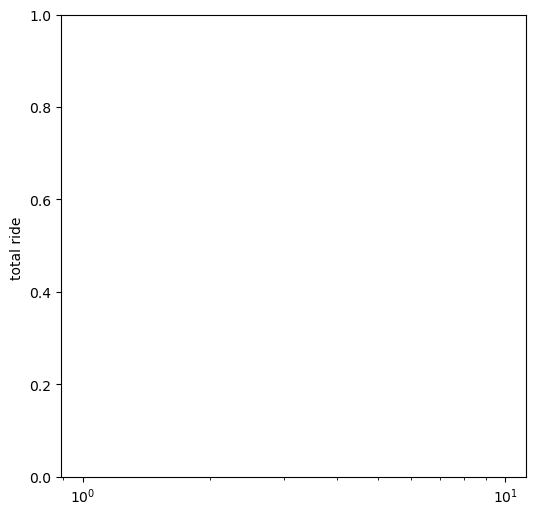

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='duration_mins')
plt.xscale('log')
plt.ylabel('total ride ')
plt.show()


In [ ]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'started_at_day', 'started_at_hour', 'ended_at_day',
       'ended_at_hour', 'duration', 'duration_mins', 'day'],
      dtype='object')

In [ ]:
import math
R = 6371  # Rayon de la Terre en kilomètres
df['distance'] = df.apply(lambda row: R * 2 * math.atan2(
    math.sqrt(
        math.sin(math.radians(row['drop_location'][0] - row['pickup_location'][0]) / 2) ** 2 +
        math.cos(math.radians(row['pickup_location'][0])) * math.cos(math.radians(row['drop_location'][0])) *
        math.sin(math.radians(row['drop_location'][1] - row['pickup_location'][1]) / 2) ** 2
    ),
    math.sqrt(1 - (
        math.sin(math.radians(row['drop_location'][0] - row['pickup_location'][0]) / 2) ** 2 +
        math.cos(math.radians(row['pickup_location'][0])) * math.cos(math.radians(row['drop_location'][0])) *
        math.sin(math.radians(row['drop_location'][1] - row['pickup_location'][1]) / 2) ** 2
    ))
) * 1000, axis=1)

In [ ]:
df_cleaned=pd.DataFrame
df_cleaned=data.drop(columns={'ride_id', 'rideable_type','started_at', 'ended_at', 'start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual','duration',})

In [ ]:
df_cleaned.columns

Index(['start_station_name', 'end_station_name', 'started_at_day',
       'started_at_hour', 'ended_at_day', 'ended_at_hour', 'duration_mins',
       'day'],
      dtype='object')

In [ ]:
df_cleaned = df_cleaned[df_cleaned['duration_mins'] >= 8]

In [ ]:
df_cleaned.shape

(2261848, 8)

In [ ]:
df_cleaned.to_csv('cleaned_demand_forecast.csv', index=False)